In [12]:
 # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
from scipy.stats import linregress
from scipy import stats
import seaborn as sns

In [18]:
nba_stats = "/Users/almon/Desktop/Final Project/Me/original_data_train.csv"
df = pd.read_csv(nba_stats)
df.head()

,TEAM,SEASON,GP,W,L,WIN%,MIN,POSS,OPP POSS,PACE,...,OPP AST/TO,OPP STL Total,OPP STL Per 100 Poss,OPP BLK Total,OPP BLK Per 100 Poss,OPP BLKA Total,OPP BLKA Per 100 Poss,OPP PF Total,OPP PF Per 100 Poss,PLAYOFF RESULT
0,Atlanta Hawks,2009-10,82,53,29,0.646,3971,7512,7506,90.77,...,1.51,506,6.741274,359,4.782840,413,5.502265,1582,21.076472,CSF
1,Atlanta Hawks,2010-11,82,44,38,0.537,3946,7412,7426,90.22,...,1.71,548,7.379478,348,4.686238,341,4.591974,1517,20.428225,CSF
2,Atlanta Hawks,2011-12,66,40,26,0.606,3233,6118,6124,90.88,...,1.36,494,8.066623,313,5.111039,303,4.947747,1263,20.623775,R1
3,Atlanta Hawks,2012-13,82,44,38,0.537,3971,7745,7736,93.56,...,1.46,689,8.906412,350,4.524302,369,4.769907,1543,19.945708,R1
4,Atlanta Hawks,2013-14,82,38,44,0.463,3966,7895,7872,95.41,...,1.52,672,8.536585,354,4.496951,326,4.141260,1643,20.871443,R1


In [15]:
stats_df = df[['TEAM','SEASON', 'FGM Per 100 Poss','FTM Per 100 Poss', 
              'OPP FGM Per 100 Poss','OPP FTM Per 100 Poss', 'PLAYOFF RESULT']]

In [16]:
stats_df.columns

Index(['TEAM', 'SEASON', 'FGM Per 100 Poss', 'FTM Per 100 Poss',
       'OPP FGM Per 100 Poss', 'OPP FTM Per 100 Poss', 'PLAYOFF RESULT'],
      dtype='object')

In [29]:
champs = stats_df[stats_df['PLAYOFF RESULT']=='Champion']
champs1 = champs.TEAM
champs1.head(10)

53       Cleveland Cavaliers
58          Dallas Mavericks
92     Golden State Warriors
94     Golden State Warriors
95     Golden State Warriors
127       Los Angeles Lakers
149               Miami Heat
150               Miami Heat
264        San Antonio Spurs
279          Toronto Raptors
Name: TEAM, dtype: object

In [30]:
champs_df = pd.DataFrame(champs1) 
champs_df.head(10)

,TEAM
53,Cleveland Cavaliers
58,Dallas Mavericks
92,Golden State Warriors
94,Golden State Warriors
95,Golden State Warriors
127,Los Angeles Lakers
149,Miami Heat
150,Miami Heat
264,San Antonio Spurs
279,Toronto Raptors


In [31]:
nba_df = champs_df.set_index('TEAM').join(stats_df.set_index('TEAM'))
nba_df.head(100)

,SEASON,FGM Per 100 Poss,FTM Per 100 Poss,OPP FGM Per 100 Poss,OPP FTM Per 100 Poss,PLAYOFF RESULT
TEAM,,,,,,
Cleveland Cavaliers,2009-10,40.958922,20.723815,38.869024,19.123295,CSF
Cleveland Cavaliers,2010-11,37.427052,20.049280,41.843604,18.617297,Out
Cleveland Cavaliers,2011-12,36.824104,19.185668,41.249187,17.810670,Out
Cleveland Cavaliers,2012-13,39.032342,17.996870,40.545123,19.157538,Out
Cleveland Cavaliers,2013-14,39.013107,17.964534,39.812315,17.547243,Out
Cleveland Cavaliers,2014-15,40.216118,18.916808,40.622153,15.801119,F
Cleveland Cavaliers,2015-16,40.847610,17.171197,38.904639,17.757732,Champion
Cleveland Cavaliers,2016-17,40.830320,17.840668,41.610487,15.867665,F
Cleveland Cavaliers,2017-18,40.790933,18.331896,42.265500,14.791076,F


In [32]:

# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


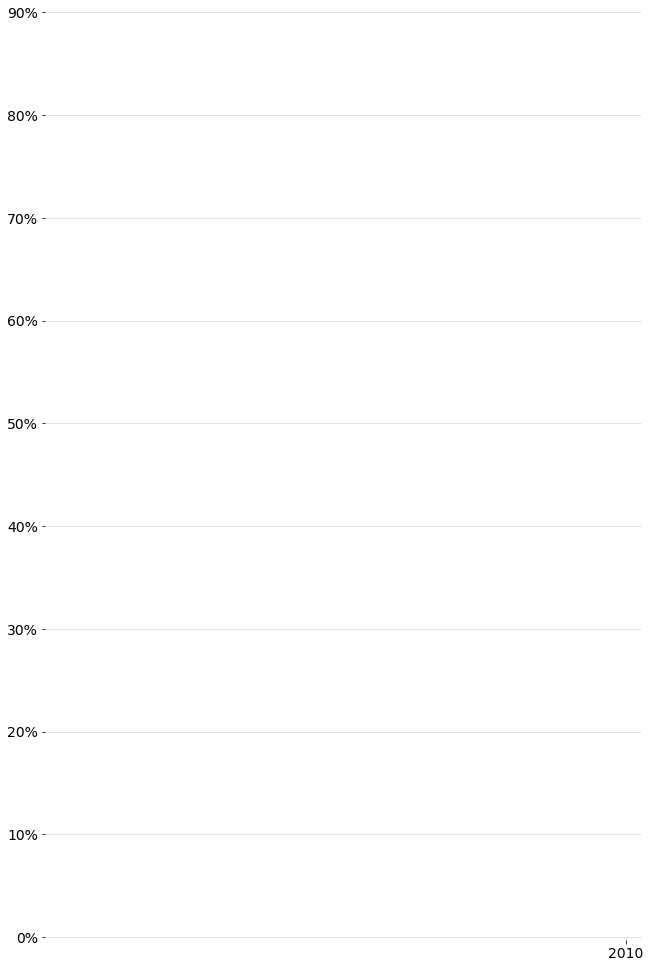

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(1969.5, 2011.1)
ax.set_ylim(-0.25, 90)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(2010, 2021, 20), fontsize=14)
plt.yticks(range(0, 91, 10), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))


# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)






In [54]:
# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
champs2 = ['Cleveland Cavaliers', 'Dallas Mavericks', 'Golden State Warriors', 
          'Los Angeles Lakers', 'Miami Heat', 'San Antonio Spurs', 'Toronto Raptors']


for rank, column in enumerate(champs2):
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_').lower()

    line = plt.plot('FGM Per 100 Poss'.label,
                    nba_df['FGM Per 100 Poss'],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = nba_df['FGM Per 100 Poss'][-1] - 0.5

    #if column in y_offsets:
        #y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2011.5, y_pos, column, fontsize=14, color=color_sequence[rank])


AttributeError: 'str' object has no attribute 'label'

NameError: name 't' is not defined

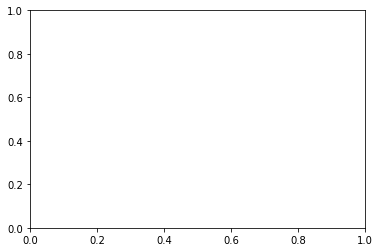

In [55]:
t = 

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()